### Load standard packages

In [1]:
import numpy as np   # for matrix multiplication 
import matplotlib.pyplot as plt # for plotting
import random       # for random number generation


Defining the sigmoid activation function

In [2]:
# sigmoid activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

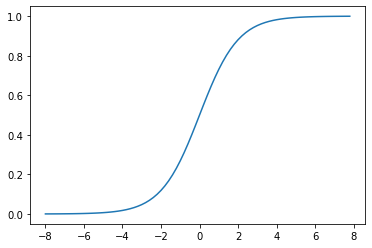

In [3]:
# test
t = np.arange(-8,8, 0.2)
plt.plot(t, sigmoid(t))

Defining the derivative of the sigmoid function

In [4]:
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

Plotting both the function and the derivative in the same chart

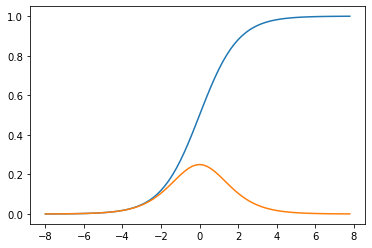

In [5]:
plt.plot(t, sigmoid(t), t,sigmoid_prime(t))

## A [4,3,2] network

Example of a list of weights (layer 1 from 4->3 nodes, and layer 2 from 3-> 2 nodes)

In [6]:
# Two layers 
# first from layer 0 with k = column = 0,1,2,3 to layer 1 with j = row = 0, 1, 2
W1 = np.array([[ 0.1, 0.2, 0.3, 0.4 ],[.3, -.2, -.3, -.1],[0.1,0.5,-1,-.2]])
print(W1)
# then from layer 1 with k = column = 0, 1, 2 to layer 2 with k = 0, 1
W2 = np.array([[0.5, 0.5, 0.2],[0.6, 0.9, 0.1]])
print(W2)

[[ 0.1  0.2  0.3  0.4]
 [ 0.3 -0.2 -0.3 -0.1]
 [ 0.1  0.5 -1.  -0.2]]
[[0.5 0.5 0.2]
 [0.6 0.9 0.1]]


The biases. The first bias adds to the layer with 3 nodes, the second to the output layer with 2 nodes

In [7]:
b1 = np.array([-0.5,0.5,0.5]).reshape(3,1)
b2 = np.array([-0.5,+0.5]).reshape(2,1)

Forward pass of input x = (3,-2,1,0)^T. Result in output a2

In [8]:
#forward pass of x = np.array([3,-2,1,0]).T
x = np.array([3,-2,1,0]).reshape(4,1)
print("x:  ", x)
# 
#  W1 @ x + b1 -> f(W1 @ x)
a1 = sigmoid(W1 @ x + b1)

print("a1  ", a1)
# a1 -> W2 @ a1 + b2 -> f
# through the activation function
# a2 = f (W2 @ a1 + b2)
a2 = sigmoid (W2 @ a1 + b2)

print("a2  ", a2)

x:   [[ 3]
 [-2]
 [ 1]
 [ 0]]
a1   [[0.42555748]
 [0.81757448]
 [0.23147522]]
a2   [[0.54186699]
 [0.81969745]]


Creating a list of the weights:

In [9]:
Weight = [W1,W2]
Weight

[array([[ 0.1,  0.2,  0.3,  0.4],
        [ 0.3, -0.2, -0.3, -0.1],
        [ 0.1,  0.5, -1. , -0.2]]),
 array([[0.5, 0.5, 0.2],
        [0.6, 0.9, 0.1]])]

and the bias

In [10]:
bias = [b1, b2]
bias

[array([[-0.5],
        [ 0.5],
        [ 0.5]]),
 array([[-0.5],
        [ 0.5]])]

Loop to each pair of (W,b). 

Here we have two layers l = {1,2}

In this case in step 1: w,b = W1, b1, 
then in step 2 w, b = W2, b2

zip(Weight, bias) = [ (W1, b1), (W2, b2) ]

Here is how it works:

In [11]:
for w, b in zip(Weight, bias):
    print("Weight \n", w)
    print("bias \n", b)

Weight 
 [[ 0.1  0.2  0.3  0.4]
 [ 0.3 -0.2 -0.3 -0.1]
 [ 0.1  0.5 -1.  -0.2]]
bias 
 [[-0.5]
 [ 0.5]
 [ 0.5]]
Weight 
 [[0.5 0.5 0.2]
 [0.6 0.9 0.1]]
bias 
 [[-0.5]
 [ 0.5]]


Apply this to feeding x throught the network

In [12]:
a = x # first input is x
for w, b in zip(Weight, bias):
    z = w @ a + b
    print("z :", z)
    a = sigmoid(z)
    print("a :", a)

z : [[-0.3]
 [ 1.5]
 [-1.2]]
a : [[0.42555748]
 [0.81757448]
 [0.23147522]]
z : [[0.16786102]
 [1.51429904]]
a : [[0.54186699]
 [0.81969745]]


Writing a function that does this automatically

In [13]:
def forward_pass(Weight, bias, x):
    for w, b in zip(Weight, bias):
        x = sigmoid(w @ x + b)
    return (x)

In [14]:
out = forward_pass(Weight, bias, x)
out

array([[0.54186699],
       [0.81969745]])

The neural network's output is assumed to be the index of whichever
neuron in the final layer has the highest activation, here, since:

In [15]:
np.max(out)

0.8196974506771258

it must be the latter index (index 1)

In [16]:
np.argmax(out)

1

### Two data points

Here we create to data points X = [ x1, x2 ] of inputs

In [17]:
X = [x, np.array([1,0,0,1]).reshape(4,1)]

In [18]:
X

[array([[ 3],
        [-2],
        [ 1],
        [ 0]]),
 array([[1],
        [0],
        [0],
        [1]])]

With the given Weights and biases we would have the predictions

In [19]:
y_preds = np.array([forward_pass(Weight, bias, x) for x in X])
y_preds

array([[[0.54186699],
        [0.81969745]],

       [[0.55078215],
        [0.81172191]]])

Suppose the targets were the following two column vectors

In [20]:
y_target = np.array([ np.array([0,1]).reshape(2,1), np.array([1,0]).reshape(2,1)])
y_target

array([[[0],
        [1]],

       [[1],
        [0]]])

How well would we do?

In [21]:
[np.argmax(a) == np.argmax(b) for a,b in zip(y_preds, y_target)]

[True, False]

The fist would be a correct prediction, the second faulty

In [22]:
def evaluate(y_preds, y_target):
    # calculate the number of correct guesses in y_preds compared to the 
    # targets in y_target.
    num = sum([np.argmax(a) == np.argmax(b) for a,b in zip(y_preds, y_target)])
    return (num) 

In [23]:
evaluate(y_preds, y_target)

1

= one correct prediction

### Backpropagation to improve the weights

Let us do backpropagation to find better weights in the layers

This first create a list of zero-biases with the same dimensions as in our network, then
 create a list of zero-weight with the same dimensions as our network (given by the list Weight)

In [24]:
nabla_b = [np.zeros(len(b)) for b in bias]
nabla_w = [np.zeros_like(w) for w in Weight]

In [25]:
nabla_b

[array([0., 0., 0.]), array([0., 0.])]

In [26]:
nabla_w

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]])]

When we run the network forwards, we must store all the activations **a** and the net activations **z** for each layer

In [27]:
# feedforward
act = x # the first activation is the inputs x
act_list = [x] # store all activations layer-by-layer
zs = [] # list to store all the z vectors, layer by layer
# loop throught all layers
for w, b in zip(Weight, bias):
    z = (w @ act + b)
    zs.append(z)
    act = sigmoid(z)
    act_list.append(act)

print(act_list)
print(zs)

[array([[ 3],
       [-2],
       [ 1],
       [ 0]]), array([[0.42555748],
       [0.81757448],
       [0.23147522]]), array([[0.54186699],
       [0.81969745]])]
[array([[-0.3],
       [ 1.5],
       [-1.2]]), array([[0.16786102],
       [1.51429904]])]


Remember that in python we can access the last element by [ -1 ]

In [28]:
act_list[-1]

array([[0.54186699],
       [0.81969745]])

In [29]:
y_target = np.array([0,1]).reshape(2,1)

In [30]:
y_target

array([[0],
       [1]])

In [31]:
act_list[-1] - y_target

array([[ 0.54186699],
       [-0.18030255]])

In [32]:
zs[-1]

array([[0.16786102],
       [1.51429904]])

In [33]:
sigmoid_prime(zs[-1])

array([[0.24824715],
       [0.14779354]])

In [34]:
(act_list[-1] - y_target)

array([[ 0.54186699],
       [-0.18030255]])

The deviance/error delta in the last layer is 

In [35]:
delta = sigmoid_prime(zs[-1]) * (act_list[-1] - y_target)
delta

array([[ 0.13451694],
       [-0.02664755]])

Calculate the gradient of the cost with respect to the the bias in the last layer based on the rules in the slides

In [36]:
nabla_b[-1] = delta
nabla_b

[array([0., 0., 0.]),
 array([[ 0.13451694],
        [-0.02664755]])]

In [37]:
act_list[-2].transpose()

array([[0.42555748, 0.81757448, 0.23147522]])

calculate the gradient of the cost with respect to the the weight in the last layer based on the formula in the slides:

In [38]:
nabla_w[-1] = np.dot(delta, act_list[-2].transpose())
nabla_w[-1]

array([[ 0.05724469,  0.10997762,  0.03113734],
       [-0.01134007, -0.02178636, -0.00616825]])

Backpropagate the error/deviance delta throught the network to the start (here only one layer more... so the loop is not neceessary). Note that range(2,3) = {2}. So here l = 2. Here we use the formulas from the slides to calculate delta and the gradients of Cost with respect to W and b:

In [39]:
for l in range(2, 3):
    z = zs[-l]
    sp = sigmoid_prime(z)
    delta = np.dot(Weight[-l+1].transpose(), delta) * sp
    nabla_b[-l] = delta
    nabla_w[-l] = np.dot(delta, act_list[-l-1].transpose())

In [40]:
nabla_b

[array([[0.01253336],
        [0.00645441],
        [0.00431192]]),
 array([[ 0.13451694],
        [-0.02664755]])]

In [41]:
nabla_w

[array([[ 0.03760009, -0.02506673,  0.01253336,  0.        ],
        [ 0.01936324, -0.01290883,  0.00645441,  0.        ],
        [ 0.01293575, -0.00862384,  0.00431192,  0.        ]]),
 array([[ 0.05724469,  0.10997762,  0.03113734],
        [-0.01134007, -0.02178636, -0.00616825]])]

Update weights based on training example:

In [42]:
eta = 0.1 # learning rate

In [43]:
New_Weights = [w-eta*nw for w, nw in zip(Weight, nabla_w)]
New_Weights

[array([[ 0.09623999,  0.20250667,  0.29874666,  0.4       ],
        [ 0.29806368, -0.19870912, -0.30064544, -0.1       ],
        [ 0.09870642,  0.50086238, -1.00043119, -0.2       ]]),
 array([[0.49427553, 0.48900224, 0.19688627],
        [0.60113401, 0.90217864, 0.10061682]])]

update bias based on training example

In [44]:
new_bias = [b-eta*nb for b, nb in zip(bias, nabla_b)]
new_bias

[array([[-0.50125334],
        [ 0.49935456],
        [ 0.49956881]]),
 array([[-0.51345169],
        [ 0.50266476]])]

Feed-forward the example x with this new weights and biases:

In [45]:
out_new = forward_pass(New_Weights, new_bias, x)
out_new

array([[0.53470864],
       [0.81982899]])

To compare with the original weights

In [46]:
out

array([[0.54186699],
       [0.81969745]])

With this small learning-rate there is not much difference. Also since one of the nodes is almost saturated (0.81982899) it updates slowly anyhow!

## Applying the code to the titanic dataset

First import the pandas package, and do a bit of cleaning:

In [47]:
import pandas as pd

In [48]:
titanic = pd.read_csv("../Data/Titanic Dataset.csv")
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
titanic = titanic[['survived','pclass', 'sex','age','sibsp']].dropna() # drop rows with missing values

Create a dummy variable for sex

In [50]:
dummies = pd.get_dummies(titanic['sex']).applymap(int) 
dummies.head(6) # checking that it works

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1


In [51]:
titanic = pd.concat([titanic, dummies.female], axis=1)
features = ['pclass', 'female','age','sibsp']
target = 'survived'
Y = titanic[target].to_numpy(dtype = float )

In [52]:
X = titanic[features].to_numpy()

In [53]:
X

array([[ 1.  ,  1.  , 29.  ,  0.  ],
       [ 1.  ,  0.  ,  0.92,  1.  ],
       [ 1.  ,  1.  ,  2.  ,  1.  ],
       ...,
       [ 3.  ,  0.  , 26.5 ,  0.  ],
       [ 3.  ,  0.  , 27.  ,  0.  ],
       [ 3.  ,  0.  , 29.  ,  0.  ]])

In [54]:
Y[0:3]

array([1., 1., 0.])

In [55]:
def vectorized_result(j):
    """Return a 2-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert survival 0/1 into a 
    corresponding desired output from the neural
    network. 0 -> [1,0] and 1 -> [0,1]"""
    e = np.zeros((2, 1))
    e[int(j)] = 1.0
    return e

In [56]:
training_results = [vectorized_result(y) for y in Y]

In [57]:
training_results[0:3]

[array([[0.],
        [1.]]),
 array([[0.],
        [1.]]),
 array([[1.],
        [0.]])]

Normalize the values so that they are all on the same scale, I suggest to use z-scores as values, see homework 3 for details.

In [58]:
def normalise(X):
    k = X.shape[0]
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X, axis =0, ddof=1) # bessels correction (not necessary but whatever)
    X = (X-X_mean)/X_std # normalise to z-scores
    return X, X_mean, X_std

In [59]:
X, X_mean, X_std =  normalise(X)
X[0:3]

array([[-1.43489222,  1.30163551, -0.06113283, -0.5512893 ],
       [-1.43489222, -0.76752975, -2.00930734,  0.54500083],
       [-1.43489222,  1.30163551, -1.93437755,  0.54500083]])

In [60]:
training_inputs = [np.reshape(x, (4, 1)) for x in X]
training_inputs[0]

array([[-1.43489222],
       [ 1.30163551],
       [-0.06113283],
       [-0.5512893 ]])

In [61]:
rng = np.random.default_rng()      # initiate random
ix_example = np.arange(len(Y))     # array [0,1,...,N]
rng.shuffle(ix_example)            # shuffle all_cols

In [62]:
# Size of layers
layers = [4,5,2] #input layer, hidden layer(s), output layer
#initiate weights
num_layers = len(layers)

For demostration purpose: **Make sure you understand how this piece of code work:** 

In [63]:
for i, j in zip(layers,layers[1:]):
    print(j,i)


5 4
2 5


Initiate some random weights and biases using .randn. Make sure you check what kind of values np.random.randn generates! 

In [64]:
bias = []
Weight = []
for i, j in zip(layers,layers[1:]):
    bias.append(np.random.randn(j,1)) # a random bias with j rows and 1 col
    Weight.append(np.random.randn(j,i))

In [65]:
bias

[array([[-2.21874275],
        [ 1.31394857],
        [ 0.48691615],
        [-1.29881651],
        [-0.24178878]]),
 array([[0.01266011],
        [0.83707934]])]

In [66]:
Weight

[array([[ 2.17695015,  0.53122333,  0.10878174, -1.24236341],
        [ 0.73097458, -1.87232922, -0.0818983 ,  1.72388319],
        [-0.73726713,  1.2375418 , -1.2837694 ,  0.38993813],
        [ 0.29370843, -0.31783093,  1.26685047, -1.3241593 ],
        [ 1.13340408,  0.31752677, -0.92158164,  0.50759796]]),
 array([[ 1.10337915, -0.60709061, -0.66917493, -1.93468763, -0.24541597],
        [-0.45742584, -0.04299985, -0.86493717, -1.20979741, -0.35155997]])]

In [67]:
def backpropagation(bias, Weight, num_layers, x, y):
    nabla_b = [np.zeros(len(b)) for b in bias]
    nabla_w = [np.zeros_like(w) for w in Weight]
    # feedforward
    act = x
    act_list = [x] # store all activations layer-by-layer
    zs = [] # list to store all the z vectors, layer by layer
    for w, b in zip(Weight, bias):
        z = (w @ act + b)
        zs.append(z)
        act = sigmoid(z)
        act_list.append(act)
    # backward pass:
    delta = sigmoid_prime(zs[-1]) * (act_list[-1] - y)
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, act_list[-2].transpose())
    for l in range(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(Weight[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, act_list[-l-1].transpose())
    return (nabla_b, nabla_w)
    

In [68]:
# running a single epoch consisting of all training examples

# initiating bias and weighs
bias = []
Weight = []
for i, j in zip(layers,layers[1:]):
    bias.append(np.random.randn(j,1)) # a random bias with j rows and 1 col
    Weight.append(np.random.randn(j,i)) # a random Weight matrix with j rows and i cols

cost = []
eta = 0.1 # learn rate
for i in ix_example:
    x = training_inputs[i]
    y = training_results[i]

    # feedforward
    act = x
    act_list = [x] # store all activations layer-by-layer
    zs = [] # list to store all the z vectors, layer by layer
    for w, b in zip(Weight, bias):
        z = np.dot(w,act) + b
        zs.append(z)
        act = sigmoid(z)
        act_list.append(act)

    # get the gradients nabla_b and nabla_w for each layer based on the training example
    nabla_b, nabla_w = backpropagation(bias, Weight, num_layers, x, y)
    # update weights based on training example
    # update weights 
    Weight = [w-eta*nw for w, nw in zip(Weight, nabla_w)]
    # update biases
    bias = [b-eta*nb for b, nb in zip(bias, nabla_b)]

In [69]:
# all predictions:
y_preds = [forward_pass(Weight, bias, x) for x in training_inputs]
y_preds[0:3]

[array([[0.26001213],
        [0.79334722]]),
 array([[0.69985499],
        [0.25257603]]),
 array([[0.28881272],
        [0.75714996]])]

In [70]:
correct_prop = evaluate(y_preds, training_results)/len(training_results)
correct_prop

0.7868068833652008

In [71]:
# slightly better than chance after a single pass.

In [72]:
# base line guess

In [73]:
1-sum(Y)/len(Y)

0.5917782026768643